In [11]:
# import modules.torchneuromorphic.ntidigits.ntidigits_dataloaders as ntidigits_dataloaders
# data_path = '/data2'

# data_dir = data_path + '/ntidigits/ntidigits_isolated.hdf5'

# # root = 'data/tidigits/ntidigits_isolated.hdf5', batch_size = 72 , chunk_size_train = 1000, chunk_size_test = 1000, ds = 1, dt = 1000, transform_train = None, transform_test = None, target_transform_train = None, target_transform_test = None, **dl_kwargs):
# train_loader, test_loader = ntidigits_dataloaders.create_dataloader(
#     root = data_dir, chunk_size_train=1000, chunk_size_test=1000, batch_size=BATCH, dt = 1000, ds = [1], num_workers=num_workers)
# synapse_conv_in_channels = 64 # conv inchannel이 아니고 FC in_channel
# CLASS_NUM = 11
# # mapping = { 0 :'0',
# #     1 :'1',
# #     2 :'2',
# #     3 :'3',
# #     4 :'4',
# #     5 :'5',
# #     6 :'6',
# #     7 :'7',
# #     8 :'8',
# #     9 :'9',
# #     10: '10'}
# assert False, "이거 train_data_count 몇개임"
# train_data_count = len(train_set) if train_data_split_indices == [] else len(train_data_split_indices)


In [12]:

import modules.tonic as tonic

from modules.tonic import DiskCachedDataset

import torch


In [13]:

data_path = '/data2'
BATCH =1

num_workers = 1
my_seed = 1
pin_memory = True

transform_compose=[]
transform_compose.append(tonic.transforms.CropTime(min=0, max=1_024_000))
transform_compose.append(tonic.transforms.ToFrame(
    sensor_size=tonic.datasets.NTIDIGITS18.sensor_size,
    # time_window=12_500, 
    time_window=10_000, 
    include_incomplete=False))
                
transform_compose = tonic.transforms.Compose(transform_compose)
train_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=True, single_digits=True, transform=transform_compose)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH, shuffle = True, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)


test_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=False, single_digits=True, transform=transform_compose)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH, shuffle = False, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)


In [14]:
print(len(train_loader))
print(len(test_loader))

2239
2260


In [15]:
timesteps=[]
targets = []
for inputs, target in train_loader:
    # print(target)
    # print("Inputs shape:", inputs.shape)
    # print("Target shape:", target.shape)
    timesteps.append(inputs.shape[1])
    targets.append(target)
    # break  # 첫 번째 배치만 확인하고 루프 종료

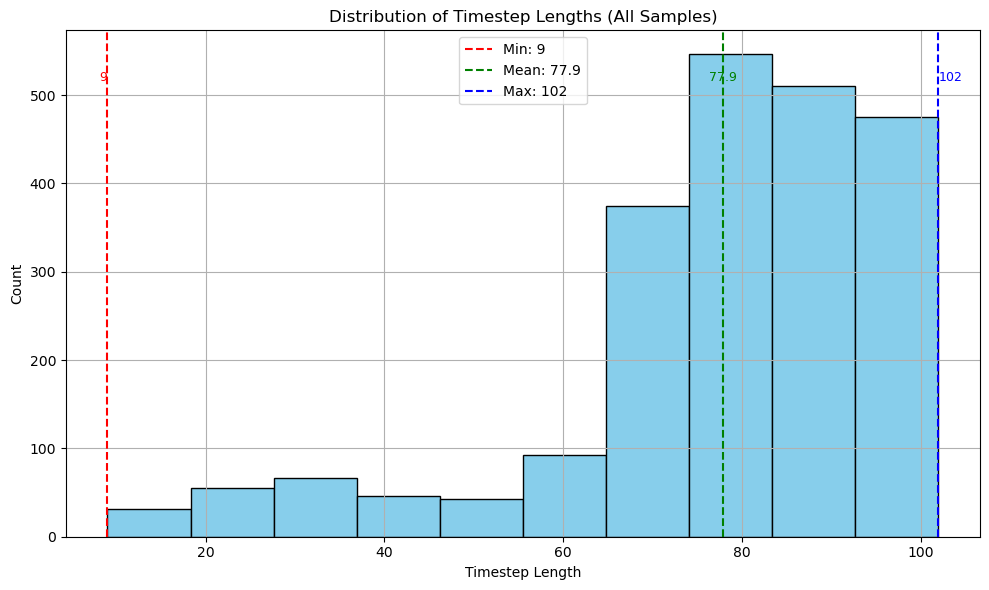

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(timesteps, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Timestep Length')
plt.ylabel('Count')
plt.title('Distribution of Timestep Lengths (All Samples)')

# 통계 계산
t_min = np.min(timesteps)
t_max = np.max(timesteps)
t_mean = np.mean(timesteps)

# 숫자 표기
plt.axvline(t_min, color='red', linestyle='--', label=f'Min: {t_min}')
plt.axvline(t_mean, color='green', linestyle='--', label=f'Mean: {t_mean:.1f}')
plt.axvline(t_max, color='blue', linestyle='--', label=f'Max: {t_max}')

# 숫자 텍스트 표기
plt.text(t_min, plt.ylim()[1]*0.9, f'{t_min}', color='red', ha='right', fontsize=9)
plt.text(t_mean, plt.ylim()[1]*0.9, f'{t_mean:.1f}', color='green', ha='center', fontsize=9)
plt.text(t_max, plt.ylim()[1]*0.9, f'{t_max}', color='blue', ha='left', fontsize=9)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


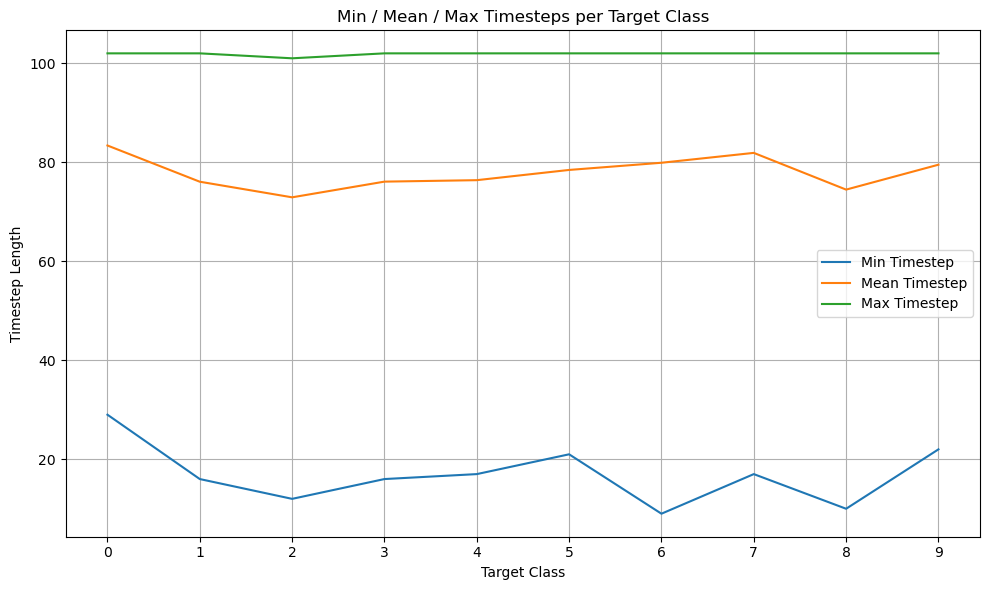

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 예시용 데이터 시뮬레이션 (실제 실행 시 train_loader 루프 결과 사용)
# targets = [tensor([3, 1, 2]), tensor([1, 3, 3]), tensor([2, 1, 1])]
# timesteps = [100, 120, 90]
# 위의 형식처럼 targets와 timesteps가 수집되었다고 가정

# 사용자가 수집한 targets와 timesteps를 numpy로 변환
# targets는 여러 배치의 텐서이므로 펼쳐야 함
flat_targets = np.concatenate([t.numpy() for t in targets])
flat_timesteps = np.concatenate([[t]*len(tg) for t, tg in zip(timesteps, targets)])

# target 클래스별 timestep 값 저장
timestep_by_class = defaultdict(list)
for target, timestep in zip(flat_targets, flat_timesteps):
    timestep_by_class[int(target)].append(timestep)

# 각 클래스별 min, mean, max 계산
classes = sorted(timestep_by_class.keys())
mins = [np.min(timestep_by_class[c]) for c in classes]
means = [np.mean(timestep_by_class[c]) for c in classes]
maxs = [np.max(timestep_by_class[c]) for c in classes]

# 시각화
x = np.arange(len(classes))
plt.figure(figsize=(10, 6))
plt.plot(x, mins, label='Min Timestep')
plt.plot(x, means, label='Mean Timestep')
plt.plot(x, maxs, label='Max Timestep')
plt.xticks(x, classes)
plt.xlabel('Target Class')
plt.ylabel('Timestep Length')
plt.title('Min / Mean / Max Timesteps per Target Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
timesteps=[]
targets = []
for inputs, target in test_loader:
    # print(target)
    # print("Inputs shape:", inputs.shape)
    # print("Target shape:", target.shape)
    timesteps.append(inputs.shape[1])
    targets.append(target)
    # break  # 첫 번째 배치만 확인하고 루프 종료

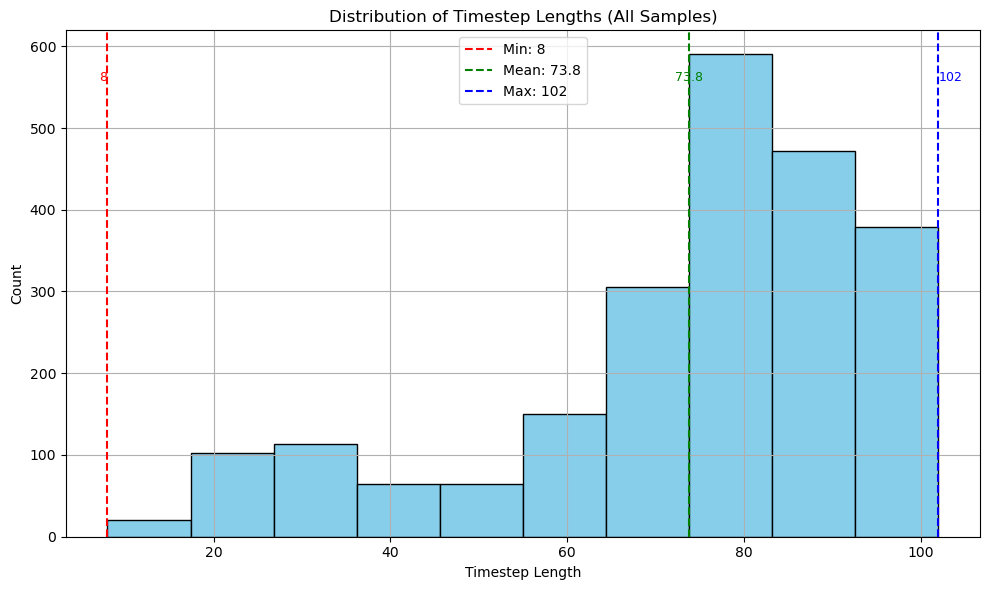

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(timesteps, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Timestep Length')
plt.ylabel('Count')
plt.title('Distribution of Timestep Lengths (All Samples)')

# 통계 계산
t_min = np.min(timesteps)
t_max = np.max(timesteps)
t_mean = np.mean(timesteps)

# 숫자 표기
plt.axvline(t_min, color='red', linestyle='--', label=f'Min: {t_min}')
plt.axvline(t_mean, color='green', linestyle='--', label=f'Mean: {t_mean:.1f}')
plt.axvline(t_max, color='blue', linestyle='--', label=f'Max: {t_max}')

# 숫자 텍스트 표기
plt.text(t_min, plt.ylim()[1]*0.9, f'{t_min}', color='red', ha='right', fontsize=9)
plt.text(t_mean, plt.ylim()[1]*0.9, f'{t_mean:.1f}', color='green', ha='center', fontsize=9)
plt.text(t_max, plt.ylim()[1]*0.9, f'{t_max}', color='blue', ha='left', fontsize=9)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


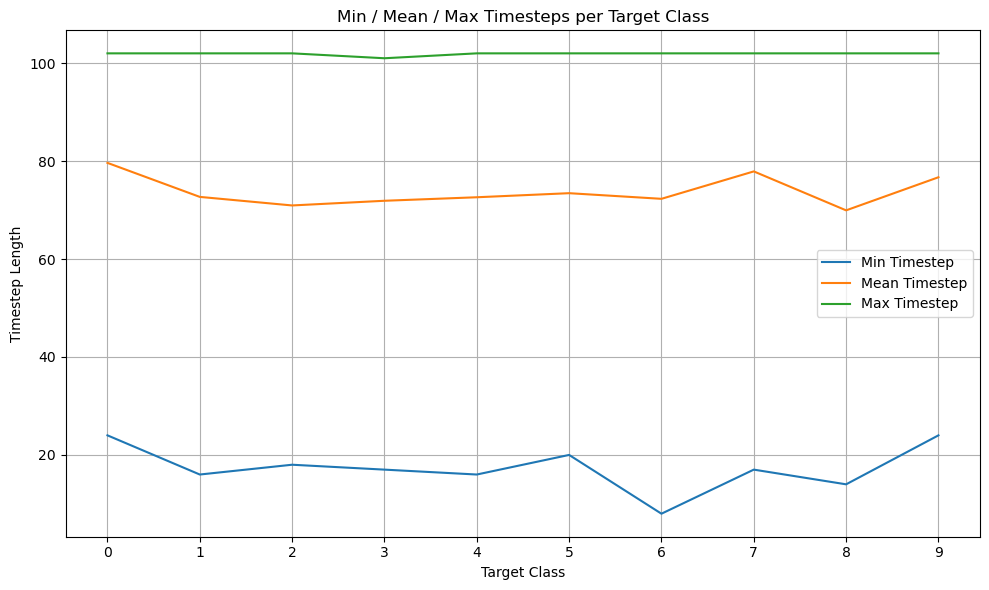

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# 예시용 데이터 시뮬레이션 (실제 실행 시 train_loader 루프 결과 사용)
# targets = [tensor([3, 1, 2]), tensor([1, 3, 3]), tensor([2, 1, 1])]
# timesteps = [100, 120, 90]
# 위의 형식처럼 targets와 timesteps가 수집되었다고 가정

# 사용자가 수집한 targets와 timesteps를 numpy로 변환
# targets는 여러 배치의 텐서이므로 펼쳐야 함
flat_targets = np.concatenate([t.numpy() for t in targets])
flat_timesteps = np.concatenate([[t]*len(tg) for t, tg in zip(timesteps, targets)])

# target 클래스별 timestep 값 저장
timestep_by_class = defaultdict(list)
for target, timestep in zip(flat_targets, flat_timesteps):
    timestep_by_class[int(target)].append(timestep)

# 각 클래스별 min, mean, max 계산
classes = sorted(timestep_by_class.keys())
mins = [np.min(timestep_by_class[c]) for c in classes]
means = [np.mean(timestep_by_class[c]) for c in classes]
maxs = [np.max(timestep_by_class[c]) for c in classes]

# 시각화
x = np.arange(len(classes))
plt.figure(figsize=(10, 6))
plt.plot(x, mins, label='Min Timestep')
plt.plot(x, means, label='Mean Timestep')
plt.plot(x, maxs, label='Max Timestep')
plt.xticks(x, classes)
plt.xlabel('Target Class')
plt.ylabel('Timestep Length')
plt.title('Min / Mean / Max Timesteps per Target Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
